<a href="https://colab.research.google.com/github/jayarnim/BasicSyntax-R/blob/main/6_Visualizing_with_GGPLOT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("ggplot2")
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
mydata <- read.csv("data/examscore.csv", header = TRUE)
mydata$highlow <- ifelse(mydata$midterm + mydata$final < 150, "low", "high")

head(mydata)

,student_id,gender,midterm,final,highlow
,<int>,<chr>,<int>,<int>,<chr>
1,1,M,62,63,low
2,2,F,60,53,low
3,3,M,60,62,low
4,4,M,30,26,low
5,5,F,80,91,high
6,6,F,33,29,low


# 1. 테마

<p align="center"><img alt="테마" src="https://github.com/jayarnim/jayarnim/assets/116495744/90bcf585-2138-4b60-bb6f-54bedbaec9c0" width=100%></p>

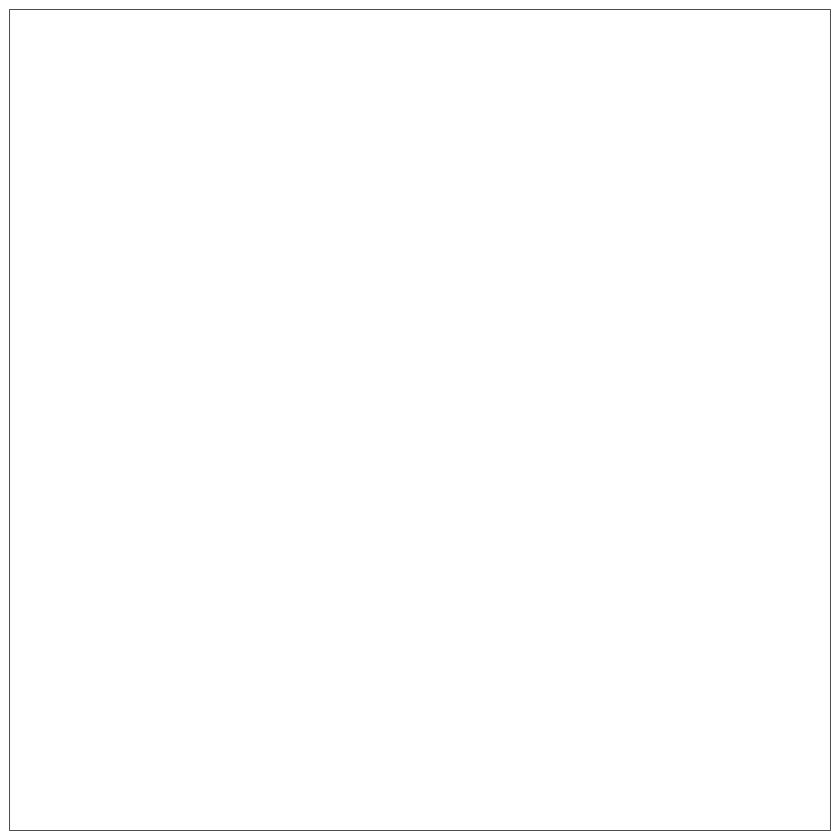

In [3]:
p <- ggplot(data = mydata) +
  # 그래프 테마 설정
  theme_bw()

p

# 2. 그래프

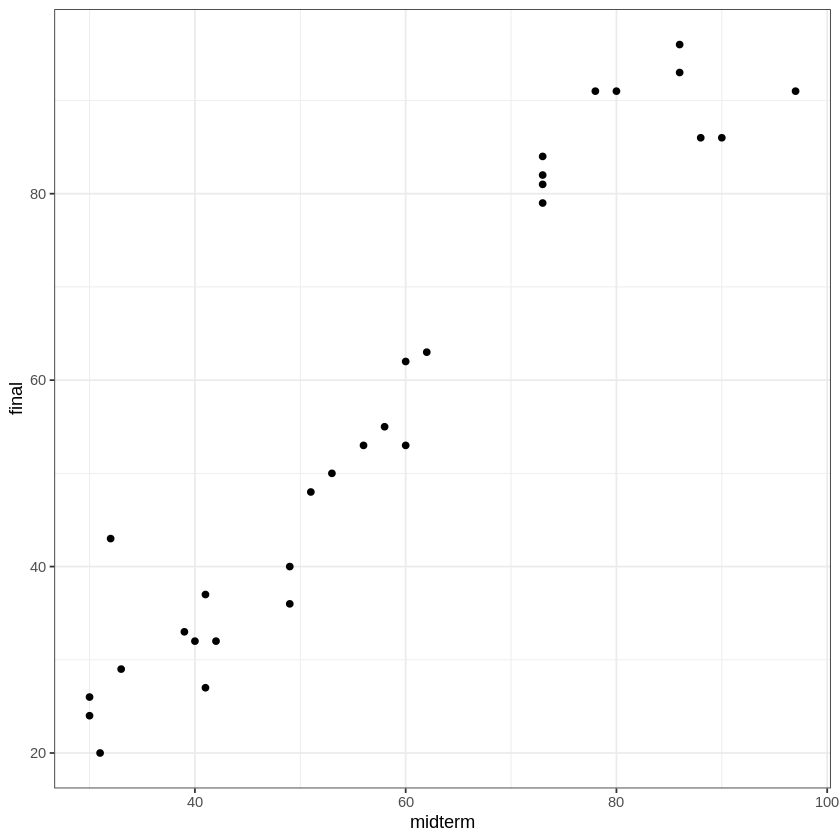

In [4]:
# 산점도 함수를 통해 산점도 그리기
# aes(aesthetic); x축, y축 속성값 설정
mygraph <- geom_point(
    aes(
        x = midterm,
        y = final
        )
    )

p <- p + mygraph
p

# 3. 범례

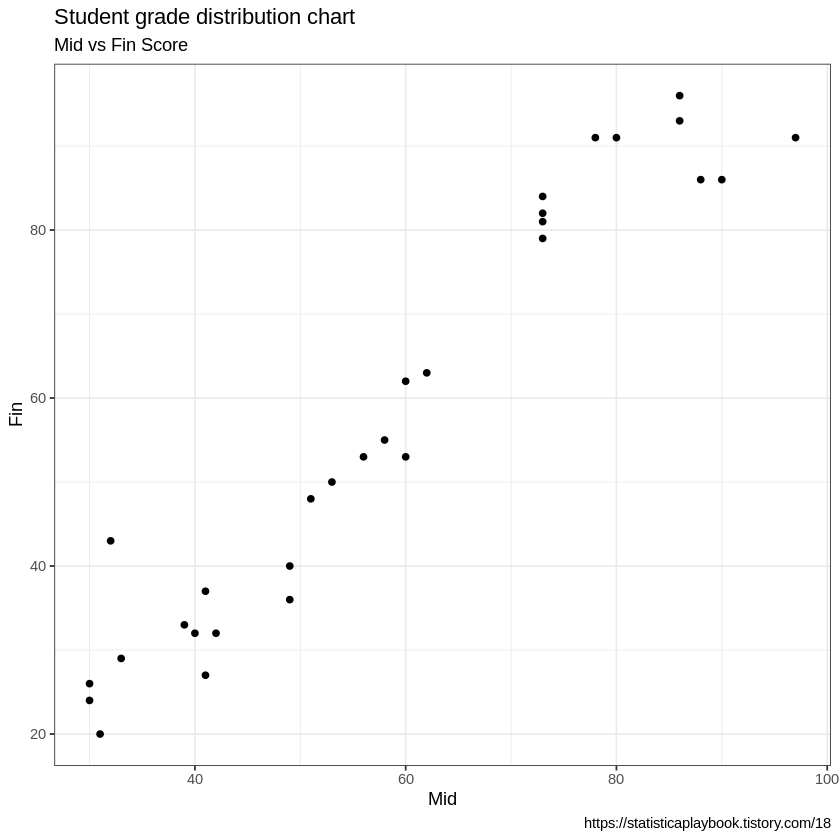

In [5]:
mylabel <- labs(
    title = "Student grade distribution chart",
    subtitle = "Mid vs Fin Score",
    x = "Mid",
    y = "Fin",
    caption = "https://statisticaplaybook.tistory.com/18"
    )

p <- p + mylabel
p

# 4. aes

- 데이터 속성과 그래프 속성(색상, 크기, 모양, 투명도 등)을 mapping 하는 함수

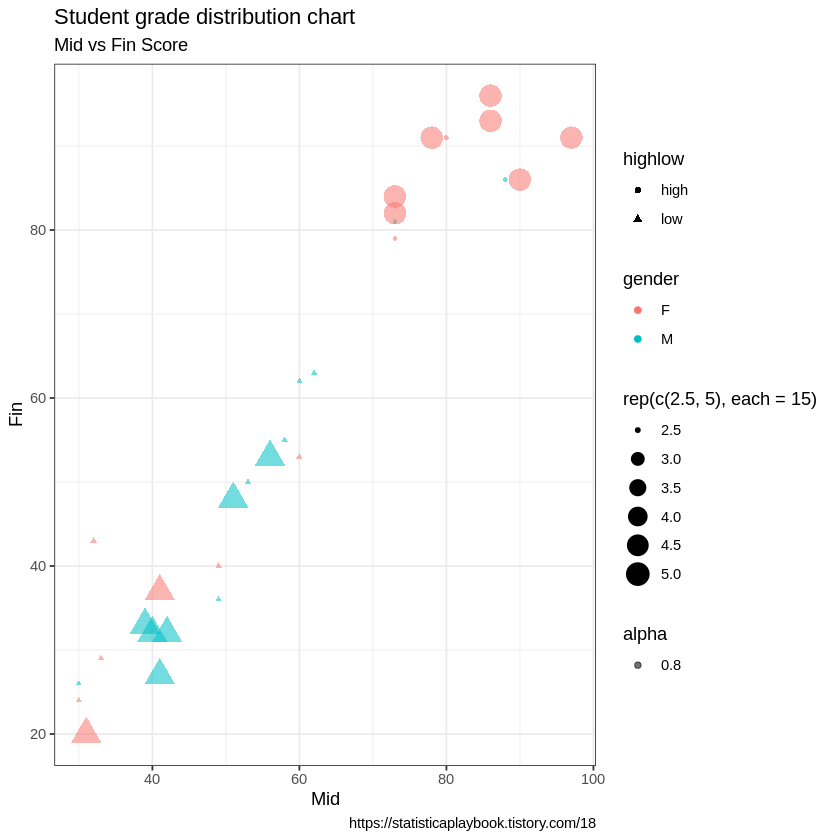

In [6]:
myaes <- aes(
    # 성별 색상 다르게 설정
    color = gender,
    # 성적별 모양 다르게 설정
    shape = highlow,
    # 처음 15개는 2.5, 나머지는 5로 크기 설정
    size = rep(c(2.5, 5), each = 15),
    # 전체 투명도 0.8
    alpha = 0.8
    )

p <- p + myaes
p

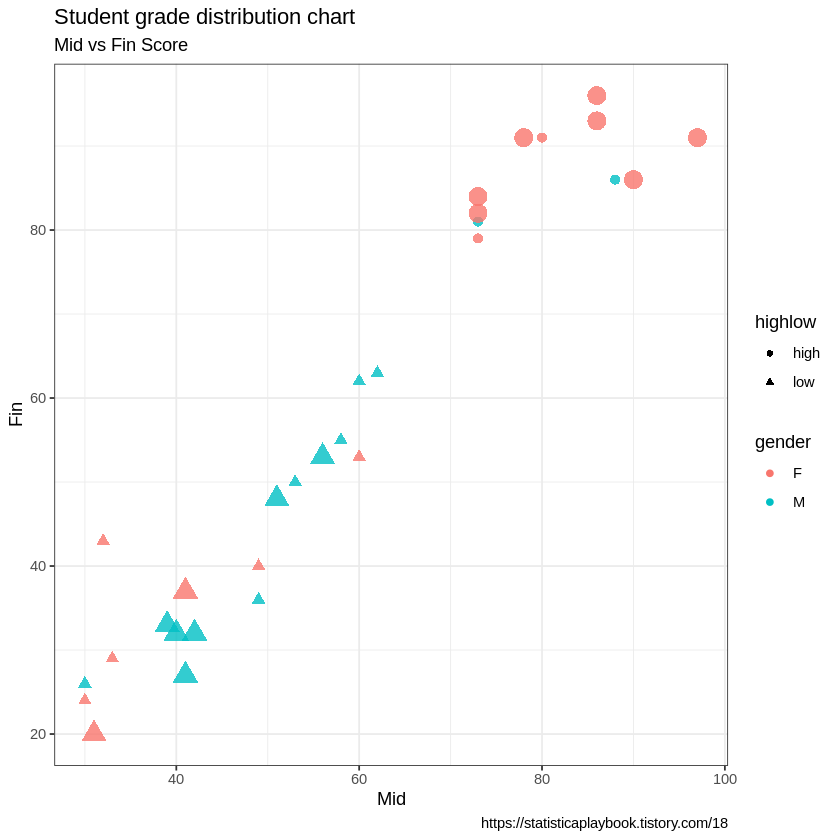

In [7]:
# alpha, size 의 경우 aes 에 설정한 사항을 확정하는 절차가 필요함
p <- p +
  scale_alpha_identity() +
  scale_size_identity()

p

# 5. scale

## color

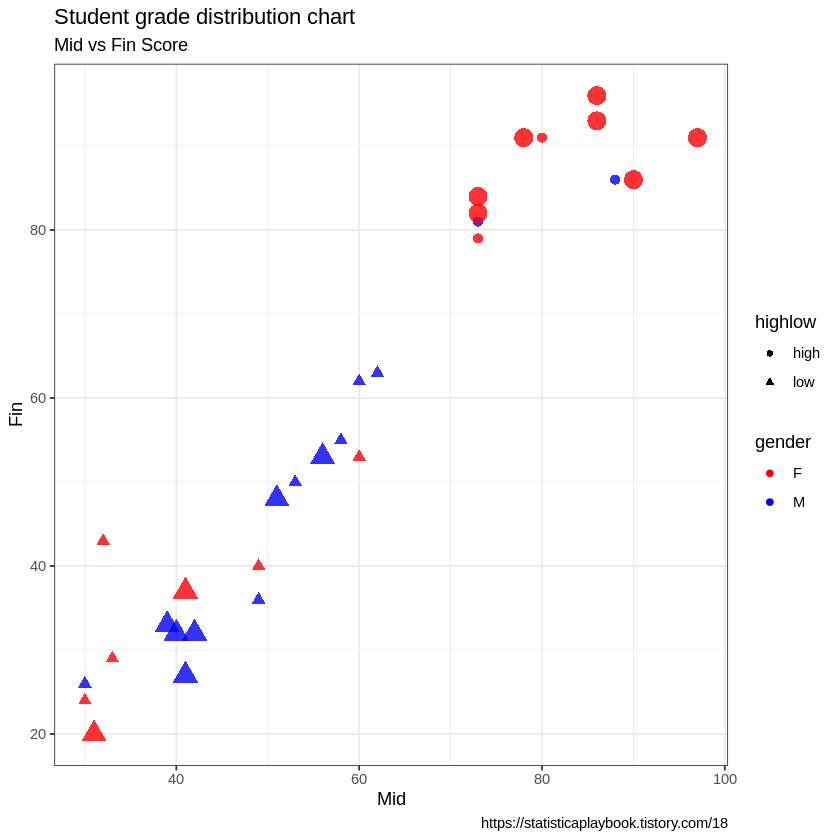

In [8]:
# 설정한 속성을 조정하고 싶을 경우
# scale(조정할 것임) + color(속성을) + manual(수동으로)
colorScaling <- scale_color_manual(
    values = c("red", "blue"),
    labels = c("F", "M")
    )

p <- p + colorScaling
p

- brewer palette 를 활용한 색상 조정

    <p align="center"><img alt="palette" src="https://github.com/jayarnim/jayarnim/assets/116495744/caacb16c-b6b2-4206-ae47-1b53f743de0d" width=100%></p>

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


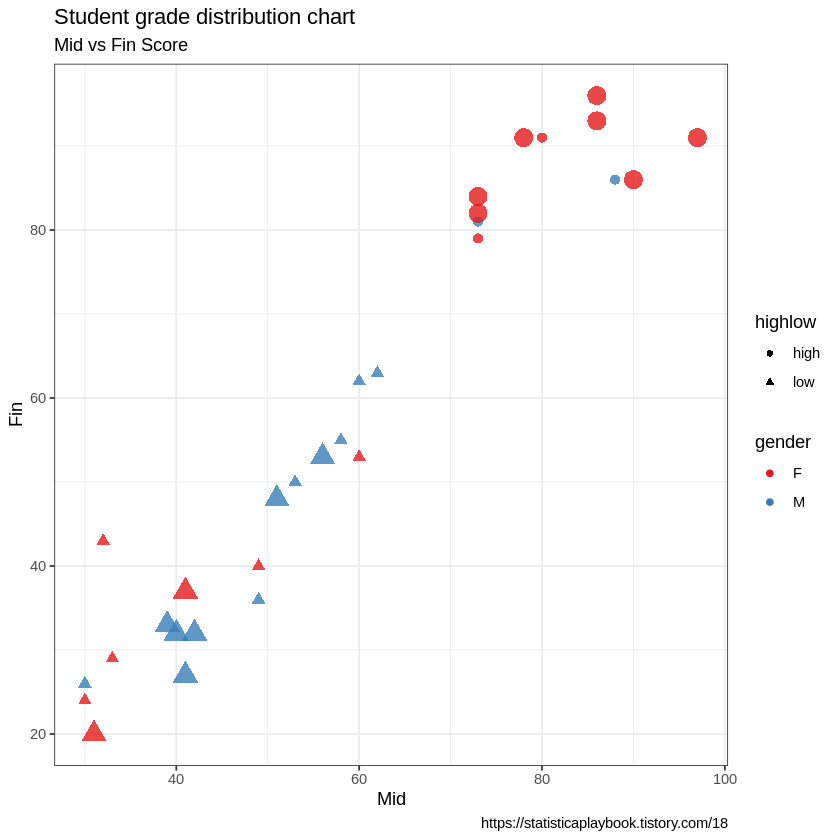

In [9]:
# scale(조정할 것임) + color(속성을) + brewer(brewer palette 로)
colorScaling <- scale_color_brewer(
    palette = "Set1",
    labels = c("F", "M")
    )

p <- p + colorScaling
p

## shape

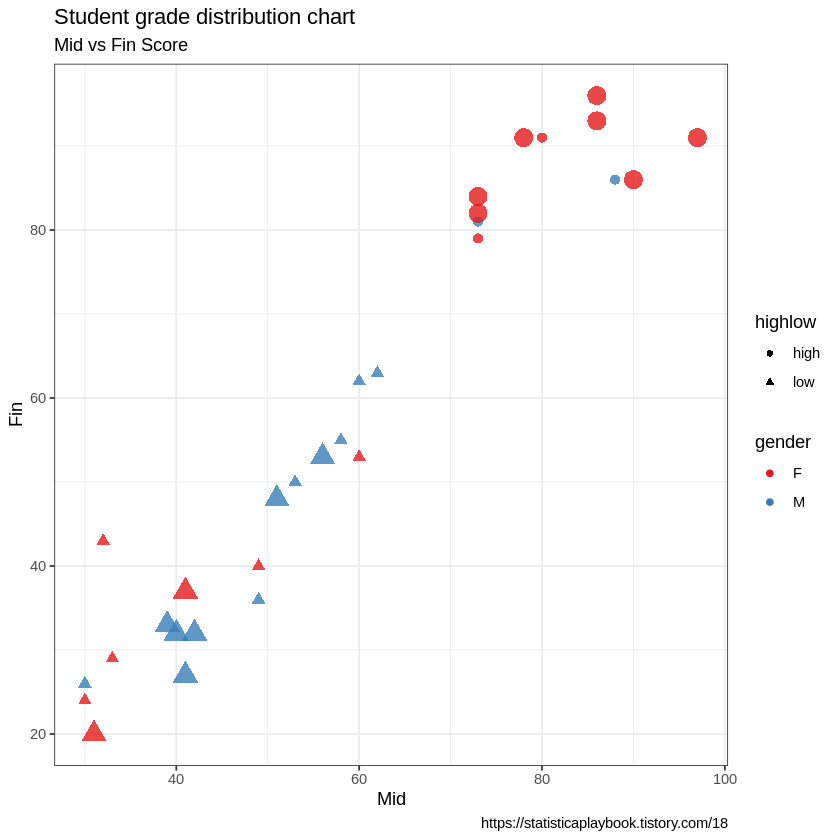

In [10]:
# 범례 key label 변경
# scale(조정할 것임) + shape(속성을) + discrete(추상 도형으로)
shapeScaling <- scale_shape_discrete(
    labels = c("high", "low")
    )

p <- p + shapeScaling
p

## axis

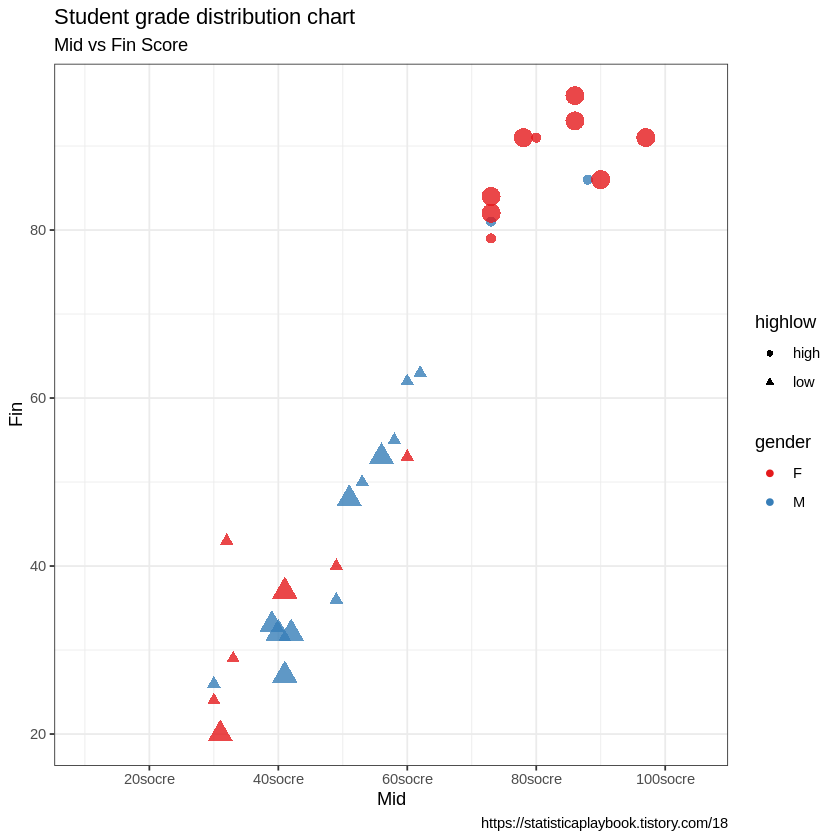

In [12]:
xScaling <- scale_x_continuous(
    # 범위
    limits = c(10, 105),
    # tick
    breaks = 1:5 * 20,
    # tick label
    labels = paste0(1:5 * 20, "socre")
    )

p <- p + xScaling
p

# 6. 범례2

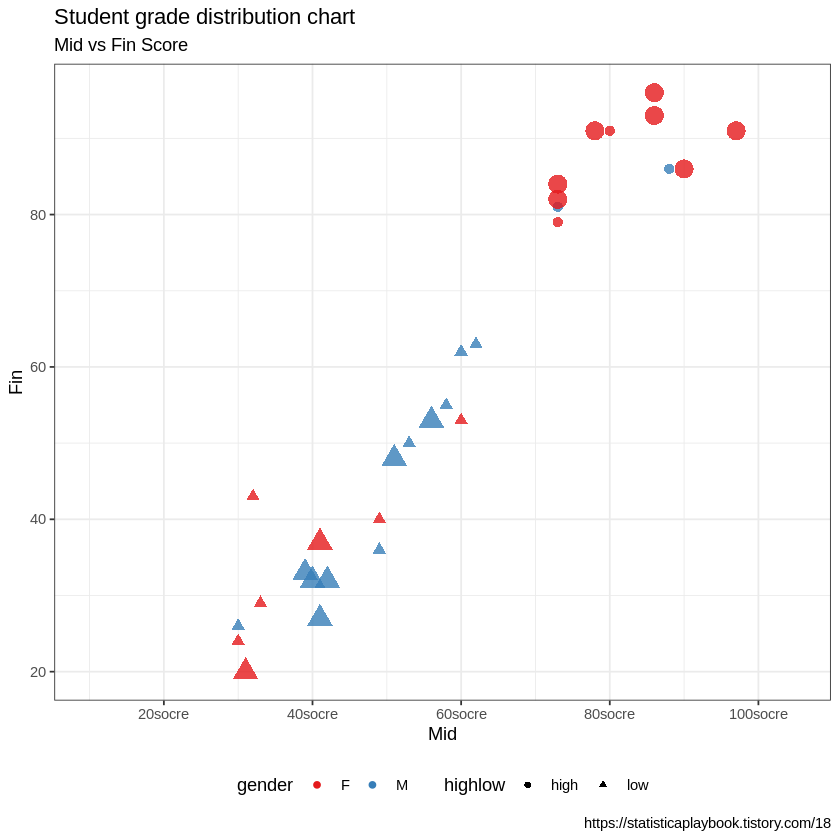

In [13]:
# 범례 위치 조정
# right, left, bottom, top, none
labelPosition <- theme(legend.position = "bottom")

p <- p + labelPosition
p

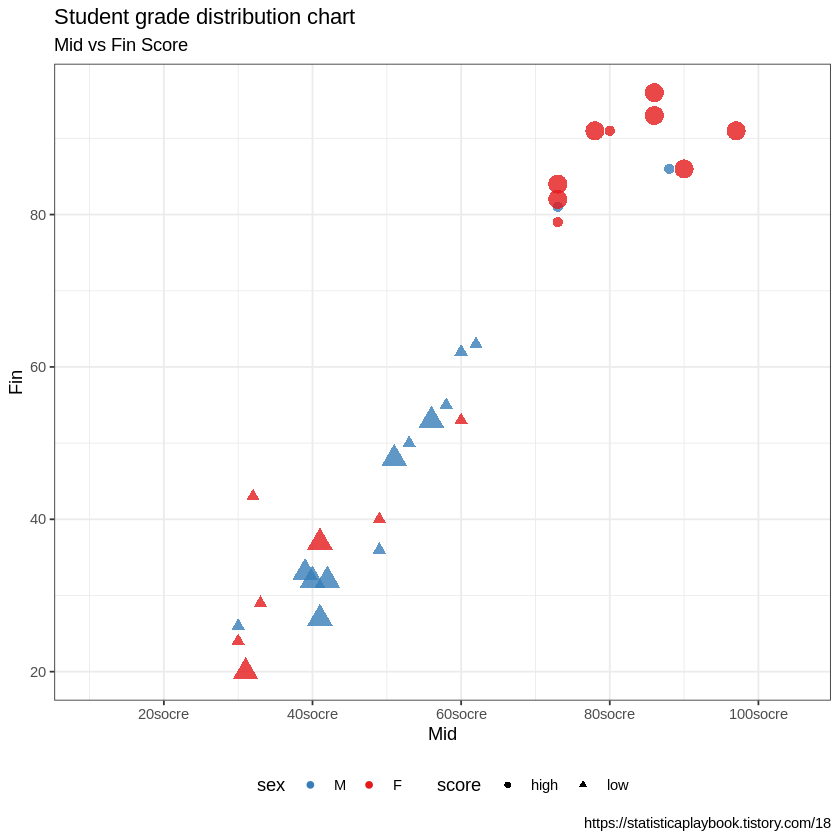

In [14]:
# 범례 title, key label 배치 방식, 범례 간 순서 조정
# title, ncol, byrow, reverse, order, e.t.c.
myGender <- guide_legend(
    title = "sex",
    ncol = 2,
    reverse = TRUE,
    order = 1
    )

myHighlow <- guide_legend(
    title = "score",
    ncol = 2,
    reverse = FALSE,
    order = 2
    )

p <- p +
  guides(
    color = myGender,
    shape = myHighlow
    )

p

# 7. annotate

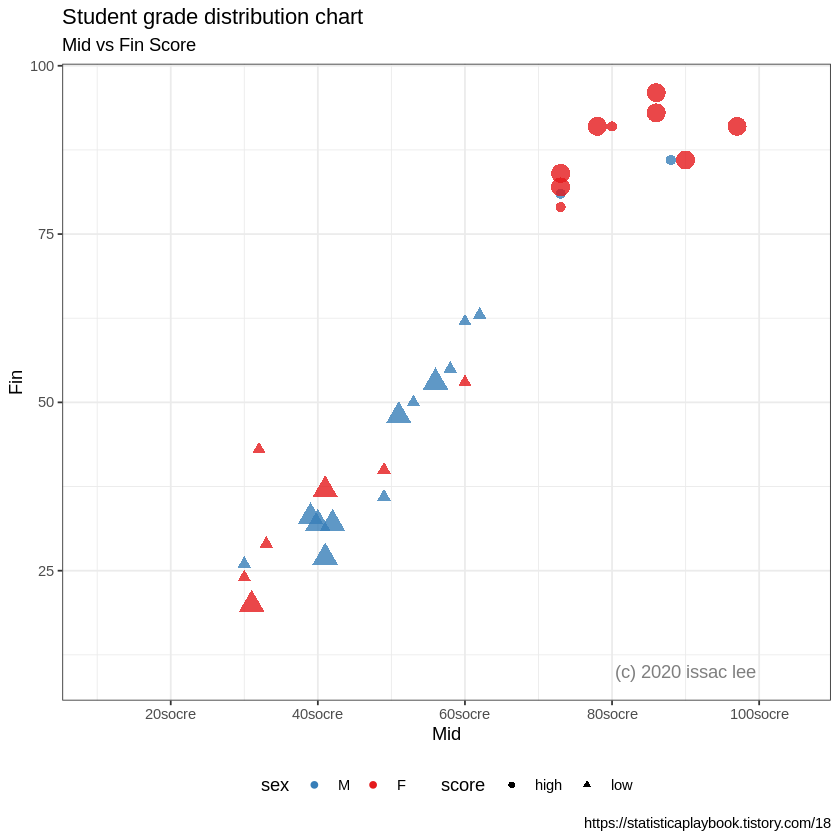

In [15]:
# 그래프에 글자 넣기
# geom : text(글씨), rect(사각형), segment(선분), pointrange(점이 중간에 찍힌 선분)
anno <- annotate(
    geom = "text",
    x = 90,
    y = 10,
    alpha = 0.5,
    label = "(c) 2020 issac lee"
    )

p <- p + anno
p

# 8. ggrepel

In [16]:
install.packages("ggrepel")
library(ggrepel)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Rcpp’




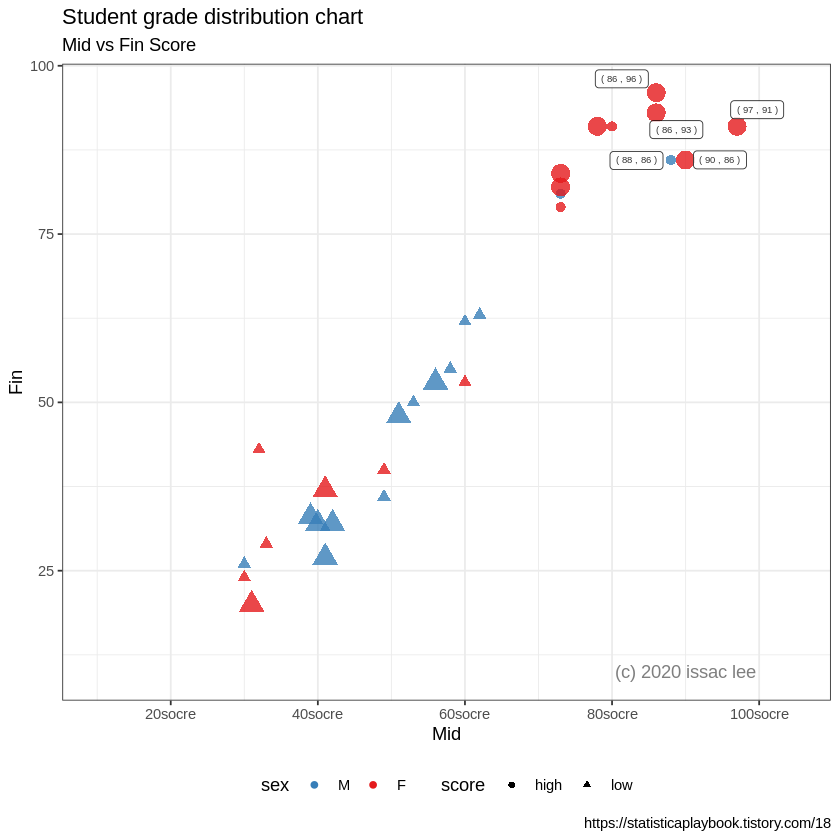

In [18]:
# 중간고사 점수가 80점 초과인 관측치만 선택
mypoints <- mydata[mydata$midterm > 80,]

myaes <- aes(
    x = midterm,
    y = final,
    label = paste("(", midterm, ",", final, ")")
    )

myrepel <- geom_label_repel(
    data = mypoints,
    myaes,
    color = "black",
    size = 2
    )

p <- p + myrepel
p

# 9. 비율 조정

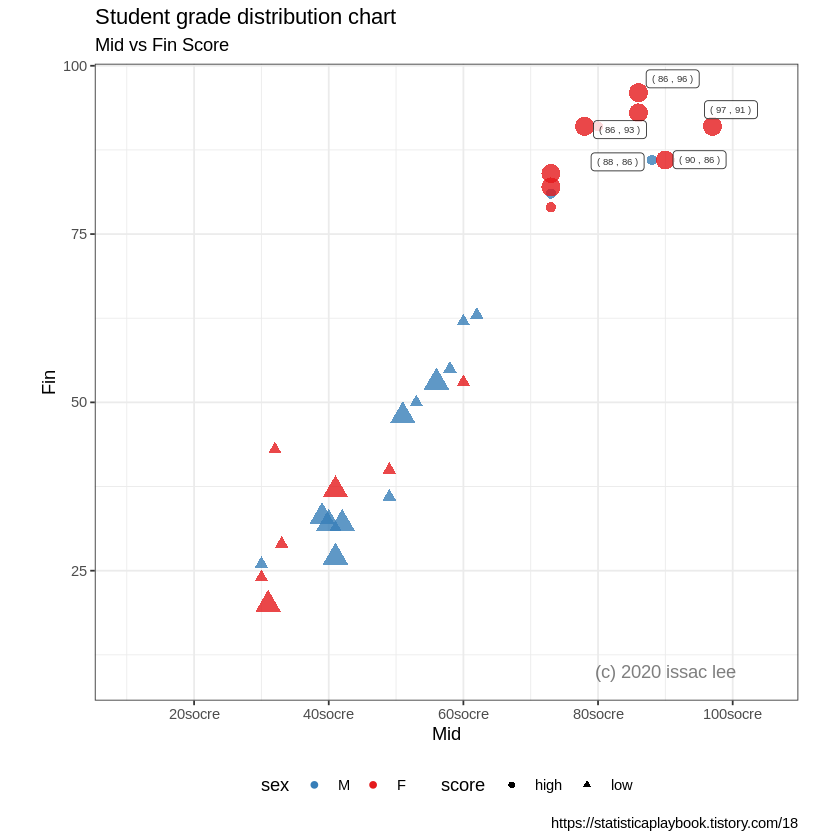

In [19]:
p <- p + coord_fixed()
p